In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2
from shutil import copyfile


In [12]:
# os.mkdir('./Brailleimagess/')

# rootdir = 'content'
# for file in os.listdir(rootdir):
#     letter = file[0]
#     for letter in os.listdir(rootdir+'/'+file):
#         copyfile(rootdir+ '/'+ file +'/'+letter, './Brailleimages/'+letter)   

In [22]:
image_dir = Path('C:/Users/AISWARYA/Desktop/MalayalamBrailleJupyter/content/MalayalamDataset2')

dir_list = list(Path('C:/Users/AISWARYA/Desktop/MalayalamBrailleJupyter/content/MalayalamDataset2').glob('*.jpg'))
image_count = len(dir_list)
print("Number of Images:"+str(image_count))

Number of Images:600


In [23]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i).split(" ")[0])

In [24]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)


In [25]:
images_list = np.array(images)
name_list = np.array(name_list).T

In [26]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0 


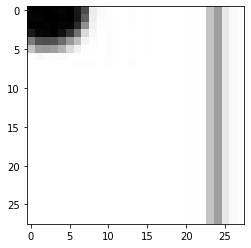

In [27]:
plt.imshow(images_list[1])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.3, random_state=42)
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024, activation="relu",input_shape=(28,28,3)),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=50, activation="softmax") #output layer
])

In [41]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [42]:
from keras.callbacks import EarlyStopping
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=200,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/200
10/10 [==============================] - 8s 260ms/step - loss: 3.9201 - sparse_categorical_accuracy: 0.0136 - val_loss: 3.9125 - val_sparse_categorical_accuracy: 0.0238
Epoch 2/200
10/10 [==============================] - 2s 188ms/step - loss: 3.9082 - sparse_categorical_accuracy: 0.0238 - val_loss: 3.9270 - val_sparse_categorical_accuracy: 0.0159
Epoch 3/200
10/10 [==============================] - 2s 190ms/step - loss: 3.8905 - sparse_categorical_accuracy: 0.0204 - val_loss: 3.9355 - val_sparse_categorical_accuracy: 0.0238
Epoch 4/200
10/10 [==============================] - 2s 184ms/step - loss: 3.8564 - sparse_categorical_accuracy: 0.0306 - val_loss: 3.9001 - val_sparse_categorical_accuracy: 0.0159
Epoch 5/200
10/10 [==============================] - 2s 187ms/step - loss: 3.8229 - sparse_categorical_accuracy: 0.0510 - val_loss: 3.8239 - val_sparse_categorical_accuracy: 0.0397
Epoch 6/200
10/10 [==============================] - 2s 191ms/step - loss: 3.5737 - sparse_cate

Epoch 46/200
10/10 [==============================] - 2s 188ms/step - loss: 4.7583e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2984 - val_sparse_categorical_accuracy: 0.9286
Epoch 47/200
10/10 [==============================] - 2s 186ms/step - loss: 4.4787e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_sparse_categorical_accuracy: 0.9286


In [43]:
score=model.evaluate(X_test, y_test)
print("Test lost: ",score[0])
print("Test Accuracy: ",score[1])

6/6 [==============================] - 0s 52ms/step - loss: 0.2998 - sparse_categorical_accuracy: 0.9167
Test lost:  0.2998027503490448
Test Accuracy:  0.9166666865348816


[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
(28, 28, 3)
1/1 [==============================] - 0s 62ms/step
[45]


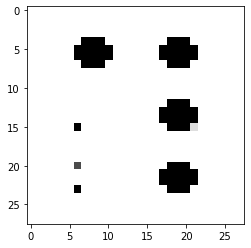

In [44]:
from tensorflow.keras.preprocessing import image
img=image.load_img('content/example_th.jpg',target_size=(28, 28,3))

plt.imshow(img)

x=image.img_to_array(img)
print(x)

print(x.shape)

x=np.expand_dims(x,axis=0)
model.predict(x)

a=np.argmax(model.predict(x), axis=1)
print(a)

In [45]:
if a==[0]:
  print('അ')
elif a==[1]:
  print('ആ')
elif a==[2]:
  print('ഐ')
elif a==[3]:
  print('ഔ') 
elif a==[4]:
  print('ബ')
elif a==[5]:
  print('ഭ')
elif a==[6]:
  print('ച')
elif a==[7]:
  print('ഛ')
elif a==[8]:
  print('ദ')
elif a==[9]:
  print('ഡ')
elif a==[10]:
  print('ഢ')
elif a==[11]:
  print('ധ')
elif a==[12]:
  print('എ')
elif a==[13]:
  print('ഏ')
elif a==[14]:
  print('ഫ')
elif a==[15]:
  print('ഗ')
elif a==[16]:
  print('ഘ')
elif a==[17]:
  print('ഹ')
elif a==[18]:
  print('ഇ')
elif a==[19]:
  print('ഈ')
elif a==[20]:
  print('ജ')
elif a==[21]:
  print('ഝ')
elif a==[22]:
  print('ക')
elif a==[23]:
  print('ഖ')
elif a==[24]:
  print('ക്ഷ')  
elif a==[25]:
  print('ല')
elif a==[26]:
  print('ഴ')
elif a==[27]:
  print('ഌ')
elif a==[28]:
  print('മ')
elif a==[29]:
  print('ന')
elif a==[30]:
  print('ഞ')
elif a==[31]:
  print('ഩ')
elif a==[32]:
  print('ണ')
elif a==[33]:
  print('ങ')
elif a==[34]:
  print('ഒ')
elif a==[35]:
  print('ഓ')
elif a==[36]:
  print('പ')
elif a==[37]:
  print('ര')
elif a==[38]:
  print('റ')
elif a==[39]:
  print('സ')
elif a==[40]:
  print('ശ')
elif a==[41]:
  print('ഷ')
elif a==[42]:
  print('ത')
elif a==[43]:
  print('ട')
elif a==[44]:
  print('ഠ')
elif a==[45]:
  print('ഥ')
elif a==[46]:
  print('ഉ')
elif a==[47]:
  print('ഊ')
elif a==[48]:
  print('വ')
elif a==[49]:
  print('യ')

ഥ


In [47]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
keras_file="Model.h5"
tf.keras.models.save_model(model,keras_file)

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)         